# Домашняя работа №1

Выполнил: Дьяконов Роман (МСМТ243)

**Вариант №5**

Импортируем библиотеки, используемые в дальнейшем

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

## Часть 1. Подготовка данных

### Чтение из файла

In [2]:
filepath = "data/HW1_var_5.csv"
data_orig_df = pd.read_csv(filepath, sep=';')
print("data_df shape:", data_orig_df.shape)
data_orig_df.head()

data_df shape: (10243, 44)


,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,5,1000005,Поступление зарплаты на счет,Покупка недвижимости/ строительство,1,0.26,мужской,0,0,среднее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,1000025,Поступление зарплаты на счет,Покупка автомобиля,1,0.45,мужской,1,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,1000045,2НДФЛ,Ремонт,1,0.49,мужской,0,0,высшее,...,0.0,66.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,1000065,Форма банка (без печати работодателя),Ремонт,1,0.38,мужской,1,0,Высшее/Второе высшее/Ученая степень,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1000085,Поступление зарплаты на счет,Ремонт,0,0.16,мужской,1,0,высшее,...,0.0,49.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Видим, что у нас имеется 44 колонки и 10243 записей

Вариант можно удалить сразу, т.к. он не имеет значимости

In [3]:
data_df = data_orig_df.drop(columns=['Номер варианта'])
data_df.shape

(10243, 43)

Далее выпишем значения по шаблону:

```
ключ - тип - количество уникальных значений:
  уникальные значения
```

In [4]:
keys_to_corr = []

for key in data_df:
    nunique = data_df[key].nunique()
    dtype = data_df[key].dtype
    print(f"{key} - {dtype} - {nunique}:")
    unique = data_df[key].unique()
    print("    ", unique)

    if dtype in [np.int64, np.float64]:
        keys_to_corr.append(key)

ID - int64 - 10243:
     [1000005 1000025 1000045 ... 1204805 1204825 1204845]
INCOME_BASE_TYPE - object - 4:
     ['Поступление зарплаты на счет' '2НДФЛ'
 'Форма банка (без печати работодателя)'
 'Свободная форма с печатью работодателя' nan]
CREDIT_PURPOSE - object - 10:
     ['Покупка недвижимости/ строительство' 'Покупка автомобиля' 'Ремонт'
 'Покупка земли' 'Отпуск' 'Обучение' 'Покупка мебели'
 'Покупка бытовой техники' 'Другое' 'Лечение']
INSURANCE_FLAG - int64 - 2:
     [1 0]
DTI - float64 - 61:
     [0.26 0.45 0.49 0.38 0.16 0.2  0.41 0.19 0.31 0.43 0.18 0.22 0.47 0.53
 0.21 0.44 0.59 0.35 0.23  nan 0.32 0.55 0.24 0.27 0.37 0.34 0.52 0.56
 0.42 0.29 0.4  0.39 0.36 0.33 0.5  0.57 0.13 0.1  0.48 0.54 0.51 0.28
 0.3  0.46 0.25 0.17 0.58 0.12 0.14 0.08 0.15 0.11 0.03 0.09 0.06 0.01
 0.07 0.04 0.05 0.02 0.6  0.  ]
SEX - object - 2:
     ['мужской' 'женский']
FULL_AGE_CHILD_NUMBER - int64 - 7:
     [ 0  1  3  2  5  4 14]
DEPENDANT_NUMBER - int64 - 3:
     [0 2 1]
EDUCATION - object - 

### Корреляционная матрица

<Axes: >

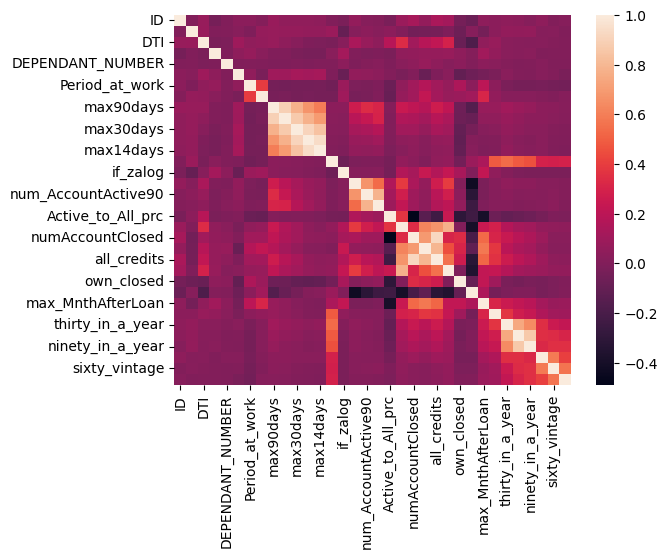

In [5]:
corr_matrix = data_df[keys_to_corr].corr()
sns.heatmap(corr_matrix)

По предыдущему выводу видим наличие нулевых и пустых значений

Теперь выведем информацию об их количестве

In [6]:
total_count = data_df.shape[0]

description_array = np.zeros((43, 7), dtype=object)

for i, key in enumerate(data_df):
    unique_count = data_df[key].nunique()
    zero_count = (data_df[key] == 0).sum()
    nan_count = pd.isna(data_df[key]).sum()
    description_array[i] = [
        key, unique_count, unique_count / total_count * 100,
        zero_count, zero_count / total_count * 100,
        nan_count, nan_count / total_count * 100
    ]

pd.set_option("display.precision", 2)
description_df = pd.DataFrame(
    description_array,
    columns=["Column", "Unique", "%unique", "Zero", "%zero", "Nan", "%Nan"]
)
description_df

,Column,Unique,%unique,Zero,%zero,Nan,%Nan
0,ID,10243,100.0,0,0.0,0,0.0
1,INCOME_BASE_TYPE,4,0.04,0,0.0,57,0.56
2,CREDIT_PURPOSE,10,0.1,0,0.0,0,0.0
3,INSURANCE_FLAG,2,0.02,4104,40.07,0,0.0
4,DTI,61,0.6,1,0.01,122,1.19
5,SEX,2,0.02,0,0.0,0,0.0
6,FULL_AGE_CHILD_NUMBER,7,0.07,6154,60.08,0,0.0
7,DEPENDANT_NUMBER,3,0.03,10214,99.72,0,0.0
8,EDUCATION,9,0.09,0,0.0,0,0.0
9,EMPL_TYPE,9,0.09,0,0.0,9,0.09


Очистим данные от значений Nan

In [7]:
data_df = data_df.drop(columns=['ID'], errors='ignore')

data_df = data_df.dropna(subset=[
    'if_zalog',
    'dlq_exist',
    'thirty_in_a_year',
    'sixty_in_a_year',
    'ninety_in_a_year',
    'thirty_vintage',
    'sixty_vintage',
    'ninety_vintage'
])
data_df = data_df.reset_index(drop=True)

data_df.head()

,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,2НДФЛ,Ремонт,1,0.49,мужской,0,0,высшее,менеджер среднего звена,>250,...,0.0,66.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Поступление зарплаты на счет,Ремонт,0,0.16,мужской,1,0,высшее,менеджер высшего звена,>250,...,0.0,49.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Поступление зарплаты на счет,Ремонт,0,0.20,женский,0,0,Высшее/Второе высшее/Ученая степень,вспомогательный персонал,>250,...,3.0,7.0,66.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Свободная форма с печатью работодателя,Покупка недвижимости/ строительство,1,0.49,женский,0,0,высшее,специалист,>250,...,0.0,5.0,57.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Форма банка (без печати работодателя),Ремонт,1,0.18,мужской,0,0,среднее-специальное,специалист,< 50,...,1.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Посчитаем статистические данные числовых колонок

In [8]:
statistic_df = pd.DataFrame(columns=[
    "Column", "mean", "median", "std", "min", "max"
])

for i, key in enumerate(data_df):
    buf = data_df[key]
    if buf.dtype == object:
        continue

    mean = buf.mean()
    median = buf.median()
    std = buf.std()
    min_v = buf.min()
    max_v = buf.max()

    statistic_df.loc[i] = [key, mean, median, std, min_v, max_v]

pd.set_option('display.float_format', '{:.2f}'.format)
statistic_df

,Column,mean,median,std,min,max
2,INSURANCE_FLAG,0.61,1.00,0.49,0.00,1.00
3,DTI,0.39,0.41,0.13,0.01,0.60
5,FULL_AGE_CHILD_NUMBER,0.53,0.00,0.79,0.00,14.00
6,DEPENDANT_NUMBER,0.00,0.00,0.08,0.00,2.00
10,BANKACCOUNT_FLAG,0.32,0.00,0.78,0.00,4.00
11,Period_at_work,56.07,40.00,55.49,6.00,966.00
12,age,35.97,34.00,8.38,23.00,62.00
16,max90days,1.59,1.00,1.91,0.00,18.00
17,max60days,1.12,1.00,1.61,0.00,18.00
18,max30days,0.82,0.00,1.34,0.00,15.00


Видим, что многие целочисленные столбцы определились как с плавающей запятой. Исправим это

In [9]:
# key_to_change = [
#     'BANKACCOUNT_FLAG', 'Period_at_work', 'age',
#     'max90days', 'max60days', 'max30days', 'max21days', 'max14days',
#     'if_zalog', 'num_AccountActive180', 'num_AccountActive90',  'num_AccountActive60',
#     'Active_to_All_prc', 'numAccountActiveAll', 'numAccountClosed',
#     'sum_of_paym_months', 'all_credits', 'Active_not_cc', 'own_closed',
#     'min_MnthAfterLoan', 'max_MnthAfterLoan', 'dlq_exist',
#     'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year',
#     'thirty_vintage', 'sixty_vintage', 'ninety_vintage',
# ]
# for key in key_to_change:
#     print(data_df[key].astype(np.int64))

In [10]:
for dtype_target in data_df.dtypes.unique():
    mask = data_df.dtypes == dtype_target
    counts = (mask).sum()
    keys = data_df.dtypes.index[mask].values
    print(f"{dtype_target} - {counts}:")
    print(f"    {keys}")

object - 9:
    ['INCOME_BASE_TYPE' 'CREDIT_PURPOSE' 'SEX' 'EDUCATION' 'EMPL_TYPE'
 'EMPL_SIZE' 'EMPL_PROPERTY' 'EMPL_FORM' 'FAMILY_STATUS']
int64 - 3:
    ['INSURANCE_FLAG' 'FULL_AGE_CHILD_NUMBER' 'DEPENDANT_NUMBER']
float64 - 30:
    ['DTI' 'BANKACCOUNT_FLAG' 'Period_at_work' 'age' 'max90days' 'max60days'
 'max30days' 'max21days' 'max14days' 'avg_num_delay' 'if_zalog'
 'num_AccountActive180' 'num_AccountActive90' 'num_AccountActive60'
 'Active_to_All_prc' 'numAccountActiveAll' 'numAccountClosed'
 'sum_of_paym_months' 'all_credits' 'Active_not_cc' 'own_closed'
 'min_MnthAfterLoan' 'max_MnthAfterLoan' 'dlq_exist' 'thirty_in_a_year'
 'sixty_in_a_year' 'ninety_in_a_year' 'thirty_vintage' 'sixty_vintage'
 'ninety_vintage']


### Кодирование строчных колонок

In [11]:
map_dict = {"мужской": 0, "женский": 1}
data_df['SEX'] = data_df['SEX'].map(map_dict)

map_dict = {
    'среднее': 0,
    'среднее-специальное': 1,
    'незаконченное высшее': 2,
    'высшее': 3,
    'второе высшее': 4,
    'ученая степень': 5,
    'Высшее/Второе высшее/Ученая степень': 4
}
data_df['EDUCATION'] = data_df['EDUCATION'].map(map_dict)
data_df

,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,2НДФЛ,Ремонт,1,0.49,0,0,0,3.00,менеджер среднего звена,>250,...,0.00,66.00,66.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Поступление зарплаты на счет,Ремонт,0,0.16,0,1,0,3.00,менеджер высшего звена,>250,...,0.00,49.00,86.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Поступление зарплаты на счет,Ремонт,0,0.20,1,0,0,4.00,вспомогательный персонал,>250,...,3.00,7.00,66.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Свободная форма с печатью работодателя,Покупка недвижимости/ строительство,1,0.49,1,0,0,3.00,специалист,>250,...,0.00,5.00,57.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Форма банка (без печати работодателя),Ремонт,1,0.18,0,0,0,1.00,специалист,< 50,...,1.00,6.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,Свободная форма с печатью работодателя,Ремонт,1,0.31,1,1,0,4.00,специалист,< 50,...,0.00,13.00,13.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3672,Форма банка (без печати работодателя),Покупка недвижимости/ строительство,0,0.44,1,1,0,3.00,вспомогательный персонал,< 50,...,3.00,12.00,69.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3673,Форма банка (без печати работодателя),Ремонт,1,0.25,1,0,0,3.00,вспомогательный персонал,>250,...,0.00,1.00,46.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00
3674,Форма банка (без печати работодателя),Ремонт,1,0.31,0,0,0,4.00,менеджер высшего звена,< 50,...,3.00,16.00,95.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### One-hot кодирование

In [12]:
def encode_dummy(df, key):
    one_hot = pd.get_dummies(df[key], prefix=key)
    df = df.drop(columns=[key])
    df = df.join(one_hot)
    return df

keys_to_dummy = [
    'INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'EMPL_TYPE',
    'EMPL_SIZE', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS'
]
for key in keys_to_dummy:
    data_df = encode_dummy(data_df, key)

with pd.option_context('display.max_rows', None):
    display(data_df.head().transpose())

,0,1,2,3,4
INSURANCE_FLAG,1,0,0,1,1
DTI,0.49,0.16,0.20,0.49,0.18
SEX,0,0,1,1,0
FULL_AGE_CHILD_NUMBER,0,1,0,0,0
DEPENDANT_NUMBER,0,0,0,0,0
EDUCATION,3.00,3.00,4.00,3.00,1.00
BANKACCOUNT_FLAG,0.00,0.00,0.00,3.00,0.00
Period_at_work,29.00,101.00,54.00,36.00,10.00
age,35.00,47.00,37.00,28.00,51.00
max90days,1.00,1.00,0.00,5.00,6.00


### Нормализация данных

In [16]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data_df), columns=data_df.columns)

with pd.option_context('display.max_rows', None):
    display(scaled_df.transpose())

,0,1,2,3,4,5,6,7,8,9,...,3666,3667,3668,3669,3670,3671,3672,3673,3674,3675
INSURANCE_FLAG,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,...,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
DTI,0.81,0.25,0.32,0.81,0.29,0.71,0.36,0.71,0.42,0.73,...,0.44,0.81,0.51,0.69,0.36,0.51,0.73,0.41,0.51,0.98
SEX,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00
FULL_AGE_CHILD_NUMBER,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,...,0.00,0.00,0.00,0.00,0.00,0.07,0.07,0.00,0.00,0.00
DEPENDANT_NUMBER,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
EDUCATION,0.60,0.60,0.80,0.60,0.20,0.60,0.60,0.60,0.20,0.60,...,0.80,0.20,0.60,0.80,0.80,0.80,0.60,0.60,0.80,0.60
BANKACCOUNT_FLAG,0.00,0.00,0.00,0.75,0.00,0.25,0.25,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Period_at_work,0.02,0.10,0.05,0.03,0.00,0.00,0.03,0.03,0.04,0.04,...,0.02,0.15,0.07,0.01,0.01,0.11,0.02,0.04,0.07,0.00
age,0.31,0.62,0.36,0.13,0.72,0.21,0.13,0.03,0.41,0.49,...,0.18,0.59,0.15,0.10,0.26,0.23,0.23,0.64,0.92,0.18
max90days,0.06,0.06,0.00,0.28,0.33,0.28,0.00,0.00,0.11,0.00,...,0.06,0.11,0.94,0.11,0.00,0.39,0.06,0.11,0.00,0.17


## Часть 2. Сегментация